### Codio Activity 12.4: Accuracy, Precision, and Recall

**Expected Time: 60 Minutes**

**Total Points: 55**

This activity focuses on differentiating between three classification metrics -- accuracy, precision, and recall.  Depending on the situation you may have different perspectives.  In this assignment, you will use the scikit-learn metrics to evaluate and compare performance metrics.  In the next assignment, you will use confusion matrices to visually intuit these ideas.  

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.datasets import load_breast_cancer
from sklearn import set_config

set_config(display="diagram")

### The Data

Your dataset for this problem will be a built in dataset from scikitlearn containing measurements determined from images of breast cancer tumors and the label of malignant or benign.  There are 30 features and the target feature.  The data is loaded and split below. 
<p>Target = 0 means the cancer is malignant, Target = 1 means the cancer is benign

In [4]:
cancer = load_breast_cancer(as_frame=True)

In [6]:
df = cancer.frame

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df['target'] = np.where(df['target'] == 0, 'malignant', 'benign')

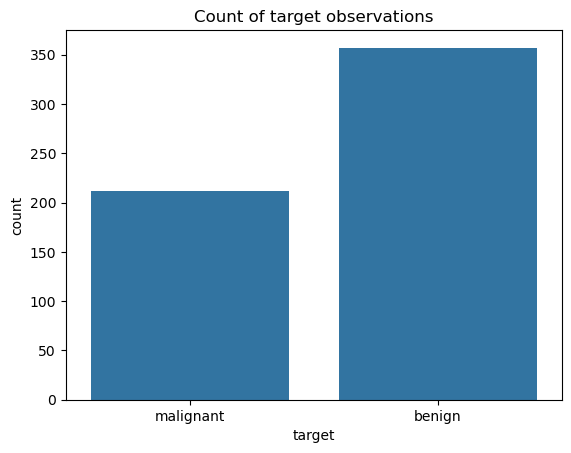

In [12]:
sns.countplot(data=df, x = 'target')
plt.title('Count of target observations');

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, 
                                                    random_state = 42,
                                                   stratify = df.target)

[Back to top](#-Index)

### Problem 1

#### Setting a Baseline

**5 Points**

It is always important to get in the habit of checking the baseline score for a classification model.  Here, when splitting the data the `stratify` argument was used so that both the train and test set would have a similar proportion of classes.  This can be seen below.  Using this data, what is a baseline score for the model that predicts the majority class for all data points?  Enter your answer as a string to `baseline` below.

```
a) 37% accuracy
b) 63% accuracy
c) 50% accuracy
d) 100% accuracy
```

In [17]:
y_test.value_counts(normalize = True)


target
benign       0.629371
malignant    0.370629
Name: proportion, dtype: float64

In [19]:
y_train.value_counts(normalize = True)

target
benign       0.626761
malignant    0.373239
Name: proportion, dtype: float64

In [21]:
### GRADED

# YOUR CODE HERE
baseline = 'b'

# Answer check
print(baseline)

b


[Back to top](#-Index)

### Problem 2

#### Pipeline for scaling and KNN

**10 Points**

To begin, create a pipeline `knn_pipe` with named steps `scale` and `knn` that uses the `StandardScaler` followed by the `KNeighborsClassifier` with `n_neighbors = 10`. Use the `fit` function on `knn_pipe` to train the pipeline on `X_train` and `y_train`.

In [24]:
### GRADED

# YOUR CODE HERE
knn_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

knn_pipe.fit(X_train, y_train)

# Answer check
knn_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

[Back to top](#-Index)

### Problem 3

#### Evaluating your classifier

**10 Points**

Three scoring methods have been imported from scikit-learn that are used by comparing predictions to actual values.  Choose which method from `precision_score`, `recall_score`, and `accuracy_score` indicate fewer false positives (where a higher score means FEWER false positives). 

To achieve this, use the `precision_score` function with arguments `y_test` and `knn_pipe.predict(X_test)` and with `pos_label`  equal to `'malignant'`. Assign yoour result to `min_fp`.


In [31]:
### GRADED

preds = knn_pipe.predict(X_test)

# YOUR CODE HERE
min_fp = precision_score(y_test, preds, pos_label='malignant')

# Answer check
print(min_fp)

0.9795918367346939


[Back to top](#-Index)

### Problem 4

#### Right kind of mistakes

**10 Points**

In this situation, which mistake is more detrimental to the patient if we attempt to use our algorithm to classify tumors as malignant or benign.  Would you rather avoid false positives or false negatives?  What metric does this mean we should use here? Enter your answer as a string to `best_metric` below -- `precision`, `recall`, or `accuracy`?

In [33]:
### GRADED

# YOUR CODE HERE
best_metric = 'recall'

# Answer check
print(best_metric)

recall


[Back to top](#-Index)

### Problem 5

#### Improving a model based on specific metric

**10 Points**

Before, when using the `GridSearchCV` the best model has been selected using the default scoring method of the estimator.  You can change this behavior by passing an appropriate metric to the `scoring` argument. 

- Use the `map` function on `y_train` with arugument equal to `target_map`. Assign your result to `y_train_numeric`.
- Use the `map` function on `y_test` with arugument equal to `target_map`. Assign your result to `y_test_numeric`.
- Use the `GridSearchCV` function to implement a grid search on `knn_pipe` for odd numbers of neighbors from 1 to 21 where `recall` is the scoring metric used. Assign the resul to `recall_grid`.
- Use the `fit` function on `recall_grid` to train your model using `X_train` and `y_train_numeric`.
- Use the `score` function on `recall_grid` to calculate the best model using `X_test` and  `y_test_numeric`. Assing your result to `best_score`.

In [37]:
target_map = {'malignant': 1, 'benign': 0}

In [39]:
### GRADED

# YOUR CODE HERE
# Map y_train and y_test to numeric values
y_train_numeric = y_train.map(target_map)
y_test_numeric = y_test.map(target_map)

# Define the parameter grid for odd numbers of neighbors from 1 to 21
param_grid = {
    'knn__n_neighbors': list(range(1, 22, 2))
}

recall_grid = GridSearchCV(knn_pipe, param_grid=param_grid, scoring='recall', cv=5)

# Fit the grid search model using X_train and y_train_numeric
recall_grid.fit(X_train, y_train_numeric)

# Calculate the best model's score on the test data using recall as the metric
best_score = recall_grid.score(X_test, y_test_numeric)

# Answer check
print(f'The best recall score is: {best_score: .2f}')

The best recall score is:  0.89


[Back to top](#-Index)

### Problem 6

#### Verifying the score

**10 Points**

Use your `recall_grid` to make predictions on the test data and assign to preds.  Use these predictions to count the number of false negatives and true positives.  Assign these as integers to `fn` and `tp` respectively below.  This should show that the grid search scoring method has been changed to recall.  

In [41]:
### GRADED

# YOUR CODE HERE
# Make predictions on the test data using recall_grid
recall_preds = recall_grid.predict(X_test)

# Initialize counters for false negatives and true positives
fn = 0  # False negatives
tp = 0  # True positives

# Loop through the predictions and actual values to count FN and TP
for pred, actual in zip(recall_preds, y_test_numeric):
    if pred == 0 and actual == 1:
        # False negative: predicted 'No' (0), but actual is 'Yes' (1)
        fn += 1
    elif pred == 1 and actual == 1:
        # True positive: predicted 'Yes' (1), and actual is 'Yes' (1)
        tp += 1

### ANSWER CHECK
print(f'Recall by hand is: {tp/(tp + fn): .2f}')

Recall by hand is:  0.89


In other situations, a different metric may make sense.  Here, a specific kind of error -- labeling a cancerous tumor as not so -- is something we certainly want to avoid.  In the next activity, you will continue to consider these issues using confusion matrices to unpack the errors and how changing parameters of the estimator effects this.